In [77]:
import pandas as pd
import numpy as np
from Plotter import Plotter
from DataFrameTransform import DataFrameTransform

df = pd.read_csv('loan_payments3.csv')
graph = Plotter(df)


In [78]:
#Skew of int64 data
print(f"{df.select_dtypes(include='int64').skew()}")

id                2.389409
member_id         2.221899
loan_amount       0.796752
delinq_2yrs       5.275737
inq_last_6mths    3.279658
open_accounts     1.058490
total_accounts    0.778410
policy_code       0.000000
dtype: float64


In [79]:
#Skew of float64 data
print(f"{df.select_dtypes(include='float64').skew()}")

funded_amount                  0.863213
funded_amount_inv              0.805913
term_months                    1.130346
int_rate                       0.437667
instalment                     0.988612
annual_inc                     8.790983
dti                            0.194341
out_prncp                      2.355036
out_prncp_inv                  2.355477
total_payment                  1.258564
total_payment_inv              1.247248
total_rec_prncp                1.249434
total_rec_int                  2.193305
total_rec_late_fee            13.263454
recoveries                    13.895854
collection_recovery_fee       27.668216
last_payment_amount            2.475530
collections_12_mths_ex_med    20.424254
dtype: float64


count    5.198600e+04
mean     7.315921e+04
std      5.201939e+04
min      3.300000e+03
25%      4.500000e+04
50%      6.200400e+04
75%      8.750000e+04
max      2.039784e+06
Name: annual_inc, dtype: float64
Skew of annual income column is 8.790983245220485


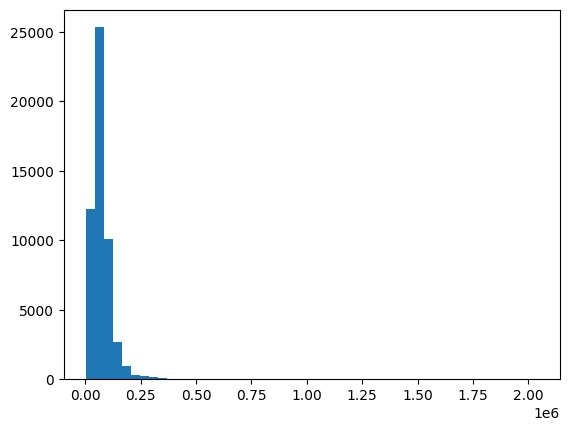

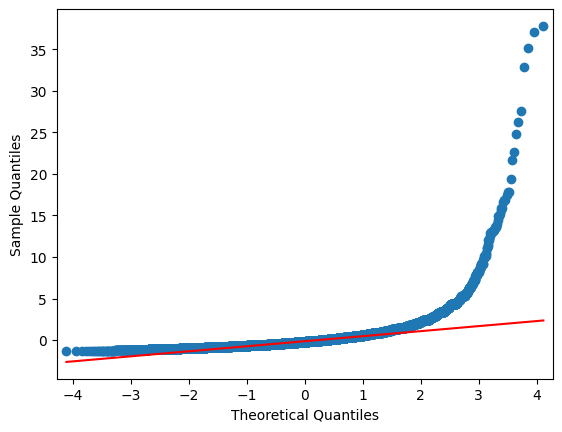

In [80]:
# Exploring annual_inc as skew is 8.7.
# I wanted to see if the data in this column is skewed due to a couple or several outliers. I have used a histogram and a qqlot to visualise this.

print(df['annual_inc'].describe())
print(f"Skew of annual income column is {df['annual_inc'].skew()}")
graph.histogram('annual_inc', 50)
graph.qqplot('annual_inc')


count    51986.000000
mean        11.054201
std          0.522783
min          8.101678
25%         10.714418
50%         11.034954
75%         11.379394
max         14.528354
Name: annual_inc, dtype: float64
The new skewness for the annual_inc column is 0.19636823180145704


<function matplotlib.pyplot.show(close=None, block=None)>

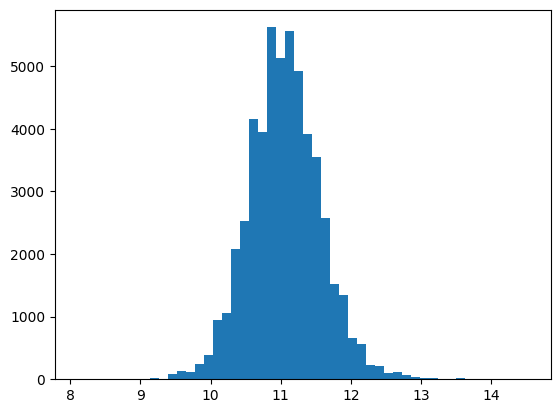

In [81]:
# As some of the data is skewed above the value of 1, I have decided to use a log transformation to reduce the amount of skew.
# I have replotted the new data on a histogram to see the changes and the new column is been imputed in a new dataframe.
# These stages will be repeated below as I continue to reduce the amount of skew across the data set.

new_column = DataFrameTransform(df)
new_df = df
new_annual_inc = new_column.logtransform('annual_inc')
new_df['annual_inc'] = new_annual_inc

print(new_df['annual_inc'].describe())
print(f'The new skewness for the annual_inc column is {new_annual_inc.skew()}')

new_graph = Plotter(new_df)
new_graph.histogram('annual_inc', 50)

count    51986.000000
mean      2758.224551
std       5183.095053
min          0.000000
25%          0.000000
50%          0.000000
75%       3384.075000
max      32399.940000
Name: out_prncp, dtype: float64
Skew of the outstanding principle column is 2.3550355918906547


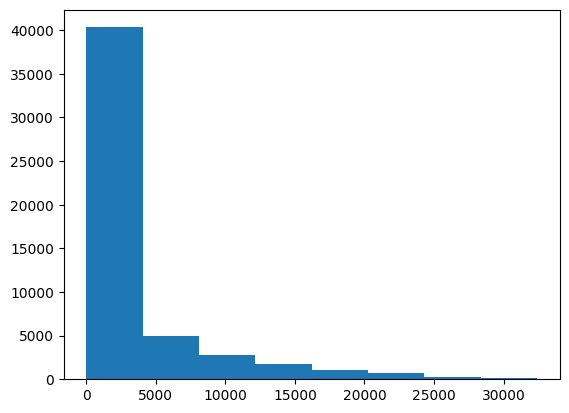

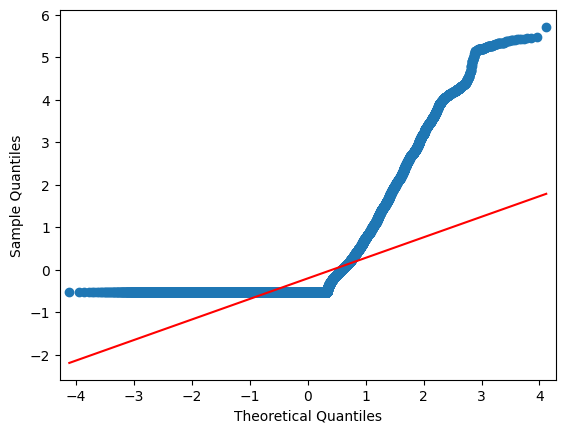

In [82]:
print(df['out_prncp'].describe())
print(f"Skew of the outstanding principle column is {df['out_prncp'].skew()}")
graph.histogram('out_prncp', 8)
graph.qqplot('out_prncp')


count    51986.000000
mean         3.161751
std          4.166263
min         -0.798508
25%          0.000000
50%          0.000000
75%          8.126836
max         10.385912
Name: out_prncp, dtype: float64
The new skewness for the outstanding principle column is 0.593801443708851


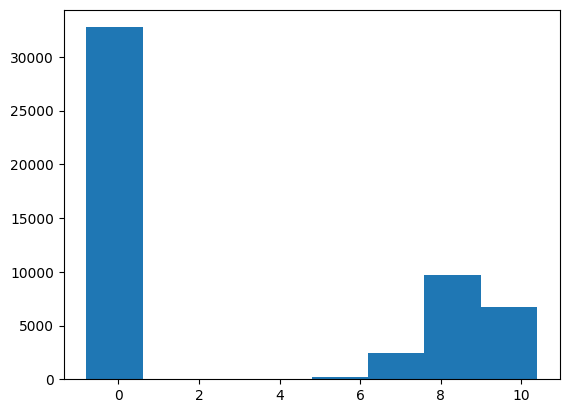

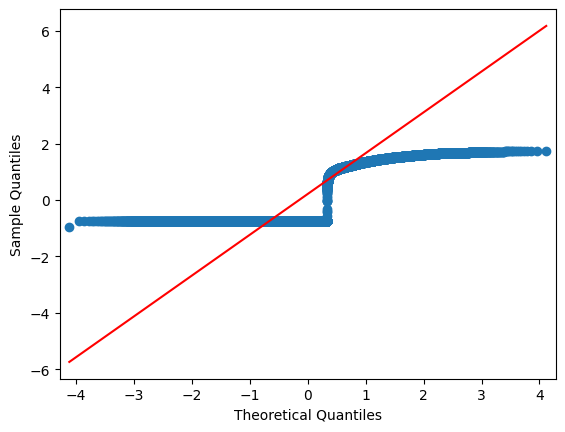

In [83]:
new_out_prncp = new_column.logtransform('out_prncp')
new_df['out_prncp'] = new_out_prncp

print(new_df['out_prncp'].describe())
print(f'The new skewness for the outstanding principle column is {new_out_prncp.skew()}')

new_graph.histogram('out_prncp', 8)
new_graph.qqplot('out_prncp')

count    51986.000000
mean        10.872931
std        120.594521
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       7002.190000
Name: collection_recovery_fee, dtype: float64
Skew of the collection recovery fee column is 27.66821608641425


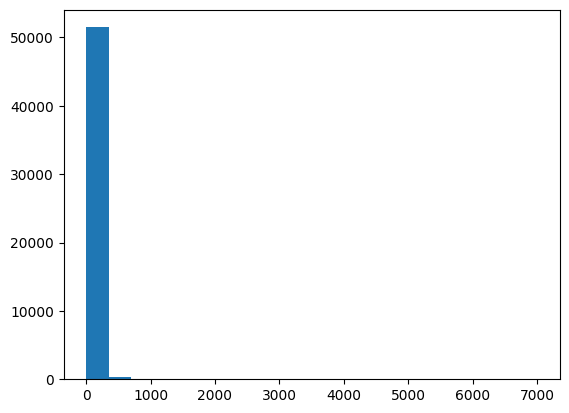

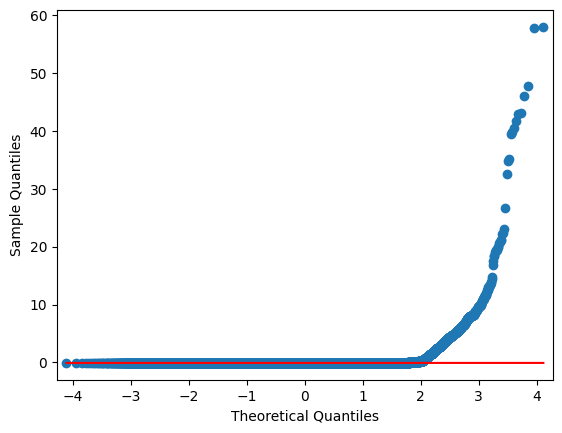

In [84]:
print(df['collection_recovery_fee'].describe())
print(f"Skew of the collection recovery fee column is {df['collection_recovery_fee'].skew()}")

graph.histogram('collection_recovery_fee', 20)
graph.qqplot('collection_recovery_fee')


count    51986.000000
mean         0.193713
std          0.925740
min         -3.101093
25%          0.000000
50%          0.000000
75%          0.000000
max          8.853978
Name: collection_recovery_fee, dtype: float64
The new skewness for the collection recovery fee column is 5.412491557871299


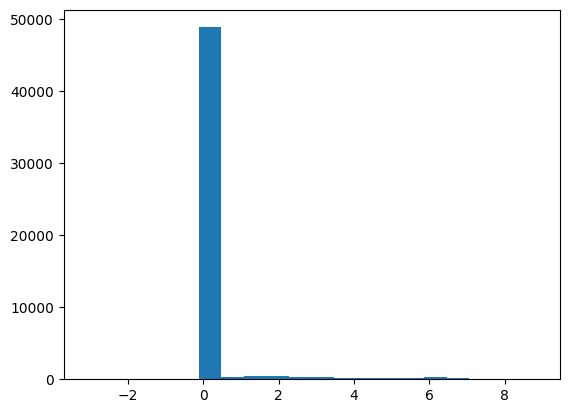

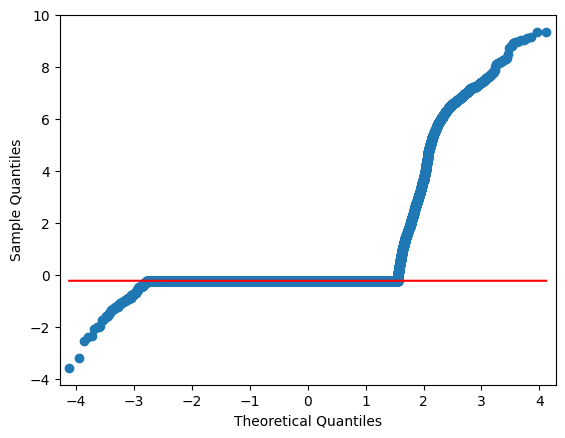

In [85]:
new_collection_recovery_fee = new_column.logtransform('collection_recovery_fee')
new_df['collection_recovery_fee'] = new_collection_recovery_fee

print(new_df['collection_recovery_fee'].describe())
print(f'The new skewness for the collection recovery fee column is {new_collection_recovery_fee.skew()}')

new_graph.histogram('collection_recovery_fee', 20)
new_graph.qqplot('collection_recovery_fee')

count    51986.000000
mean         0.907643
std          6.236588
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        358.680000
Name: total_rec_late_fee, dtype: float64


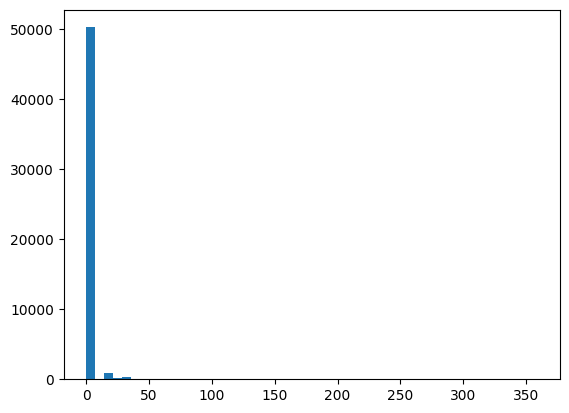

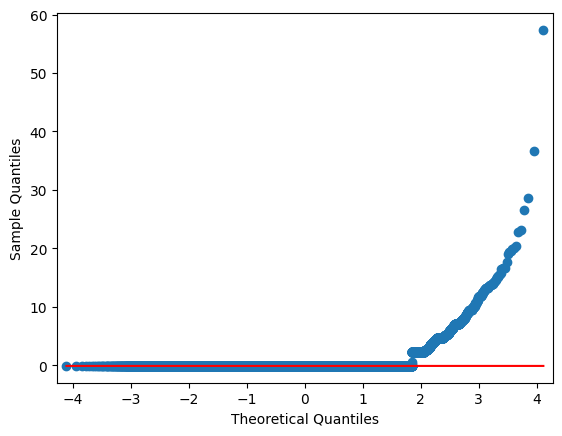

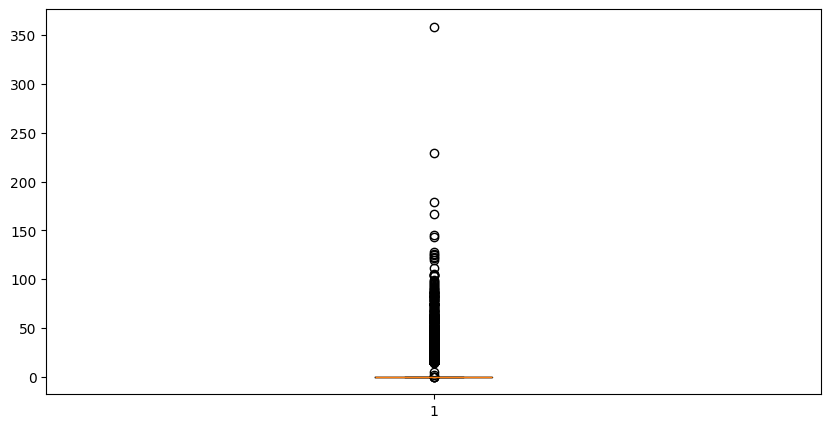

Skew of the total received late fee column is 13.263454432820854


In [86]:
print(df['total_rec_late_fee'].describe())
graph.histogram('total_rec_late_fee', 50)
graph.qqplot('total_rec_late_fee')
graph.boxplot('total_rec_late_fee')

print(f"Skew of the total received late fee column is {df['total_rec_late_fee'].skew()}")

count    51986.000000
mean         0.102878
std          0.570141
min         -4.605170
25%          0.000000
50%          0.000000
75%          0.000000
max          5.882431
Name: total_rec_late_fee, dtype: float64
The new skewness for the total_rec_late_fee column is 5.483945937839195


<function matplotlib.pyplot.show(close=None, block=None)>

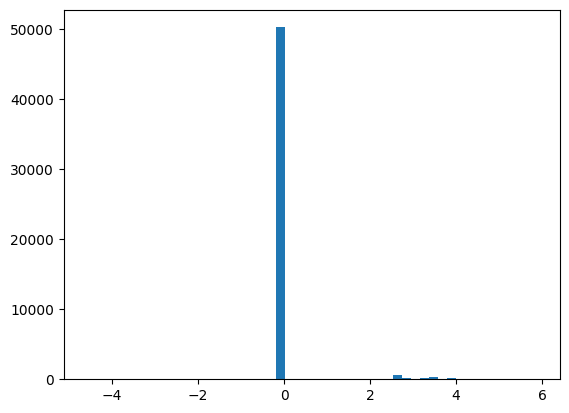

In [87]:
new_total_rec_late_fee = new_column.logtransform('total_rec_late_fee')
new_df['total_rec_late_fee'] = new_total_rec_late_fee

print(new_df['total_rec_late_fee'].describe())
print(f'The new skewness for the total_rec_late_fee column is {new_total_rec_late_fee.skew()}')

new_graph.histogram('total_rec_late_fee', 50)

In [88]:
print(f"{new_df.select_dtypes(include='float64').skew()}")

funded_amount                  0.863213
funded_amount_inv              0.805913
term_months                    1.130346
int_rate                       0.437667
instalment                     0.988612
annual_inc                     0.196368
dti                            0.194341
out_prncp                      0.593801
out_prncp_inv                  2.355477
total_payment                  1.258564
total_payment_inv              1.247248
total_rec_prncp                1.249434
total_rec_int                  2.193305
total_rec_late_fee             5.483946
recoveries                    13.895854
collection_recovery_fee        5.412492
last_payment_amount            2.475530
collections_12_mths_ex_med    20.424254
dtype: float64
